# Extract weather data for individual stations

### Create smaller data files to use in workshop exercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

### Read data from .csv file

#### 24 hours of weather data from various airport stations across Canada

In [2]:
df_all = pd.read_csv('../data/weather_stations.csv', index_col=0, parse_dates=True)
df_all.head()

,Timezone,Hour of Day,Station ID,Station Name,Latitude,Longitude,Conditions,Temperature (C),Relativehumidity(%),Dew point(C),Humidex (C),Pressure(kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind chill (C)
Datetime,,,,,,,,,,,,,,,,
2018-05-21 00:00:00,Canada/Pacific,0,YVR,Vancouver Int'l Airport,49.1,-123.1,Mostly Cloudy,12.9,78,9,NaN,101.8,32,E,12.0,NaN
2018-05-21 01:00:00,Canada/Pacific,1,YVR,Vancouver Int'l Airport,49.1,-123.1,Mostly Cloudy,12.4,79,9,NaN,101.8,32,SE,10.0,NaN
2018-05-21 02:00:00,Canada/Pacific,2,YVR,Vancouver Int'l Airport,49.1,-123.1,Mostly Cloudy,12.8,83,10,NaN,101.8,32,E,11.0,NaN
2018-05-21 03:00:00,Canada/Pacific,3,YVR,Vancouver Int'l Airport,49.1,-123.1,Cloudy,12.6,85,10,NaN,101.8,32,SW,4.0,NaN
2018-05-21 04:00:00,Canada/Pacific,4,YVR,Vancouver Int'l Airport,49.1,-123.1,Cloudy,12.3,84,10,NaN,101.8,32,SE,8.0,NaN


### Explore the data a bit

In [3]:
pd.unique(df_all['Station Name'])

array(["Vancouver Int'l Airport", "Victoria Int'l Airport",
       'Prince George Airport', 'Whitehorse Airport',
       'Yellowknife Airport', 'Iqaluit Airport', "Edmonton Int'l Airport",
       "Calgary Int'l Airport", "Saskatoon Diefenbaker Int'l Airport",
       "Regina Int'l Airport", "Winnipeg Richardson Int'l Airport",
       'Thunder Bay Airport', "Toronto Pearson Int'l Airport",
       "Ottawa Macdonald-Cartier Int'l Airport",
       "Montreal-Trudeau Int'l Airport", "Quebec Lesage Int'l Airport",
       "Fredericton Int'l Airport", "Halifax Stanfield Int'l Airport",
       'Charlottetown Airport', "St. John's Int'l Airport"], dtype=object)

In [4]:
df_all['Conditions'].value_counts()

Mostly Cloudy       140
Partly Cloudy       109
Mainly Sunny         73
Clear                48
Mainly Clear         42
Sunny                37
Cloudy               18
Light Snow            8
Light Rainshower      4
Light Rain            1
Name: Conditions, dtype: int64

In [5]:
df_all.describe()

,Hour of Day,Latitude,Longitude,Temperature (C),Relativehumidity(%),Dew point(C),Humidex (C),Pressure(kPa),Visibility (km),Wind Speed (km/hr),Wind chill (C)
count,480.000000,480.000000,480.0000,480.000000,480.000000,480.000000,3.0,480.000000,480.000000,480.000000,24.000000
mean,11.500000,50.440000,-92.9150,13.922292,52.297917,3.029167,24.0,101.427083,30.558333,15.160417,-10.458333
std,6.929408,5.701678,24.6829,7.584069,21.003549,4.611774,3.0,0.491022,12.914717,7.955598,2.302724
min,0.000000,43.600000,-135.0000,-8.000000,14.000000,-12.000000,21.0,100.200000,13.000000,0.000000,-14.000000
25%,5.750000,46.100000,-114.1000,8.700000,34.000000,1.000000,22.5,101.100000,24.000000,9.000000,-13.000000
50%,11.500000,48.850000,-93.2500,14.550000,49.000000,3.000000,24.0,101.400000,24.000000,14.000000,-10.000000
75%,17.250000,52.400000,-70.6000,19.500000,69.000000,6.000000,25.5,101.800000,32.000000,22.000000,-8.750000
max,23.000000,63.700000,-52.7000,29.700000,100.000000,12.000000,27.0,102.500000,64.000000,39.000000,-6.000000


In [6]:
df_all.groupby('Station Name').mean()

,Hour of Day,Latitude,Longitude,Temperature (C),Relativehumidity(%),Dew point(C),Humidex (C),Pressure(kPa),Visibility (km),Wind Speed (km/hr),Wind chill (C)
Station Name,,,,,,,,,,,
Calgary Int'l Airport,11.5,51.1,-114.0,17.466667,39.958333,3.375000,NaN,101.291667,46.333333,11.916667,NaN
Charlottetown Airport,11.5,46.2,-63.1,10.637500,57.750000,1.791667,NaN,101.366667,24.000000,16.291667,NaN
Edmonton Int'l Airport,11.5,53.3,-113.5,17.633333,52.291667,6.833333,NaN,101.116667,24.000000,16.166667,NaN
Fredericton Int'l Airport,11.5,45.8,-66.5,13.629167,47.750000,0.458333,NaN,101.525000,16.000000,15.166667,NaN
Halifax Stanfield Int'l Airport,11.5,44.8,-63.5,14.300000,52.583333,3.375000,NaN,101.516667,23.958333,18.208333,NaN
Iqaluit Airport,11.5,63.7,-68.5,-4.458333,70.125000,-9.166667,NaN,100.950000,43.000000,18.583333,-10.458333
Montreal-Trudeau Int'l Airport,11.5,45.4,-73.7,17.695833,48.541667,6.208333,21.0,101.900000,40.000000,17.583333,NaN
Ottawa Macdonald-Cartier Int'l Airport,11.5,45.3,-75.6,17.170833,51.583333,6.250000,NaN,102.033333,24.000000,14.833333,NaN
Prince George Airport,11.5,53.8,-122.6,13.691667,58.583333,4.916667,NaN,101.600000,15.875000,7.208333,NaN


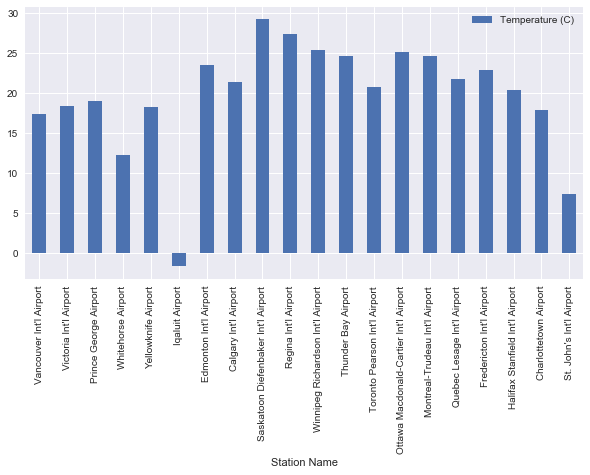

In [7]:
hour = 15
df_plot = df_all.loc[df_all['Hour of Day'] == hour, ['Station Name', 'Temperature (C)']]
df_plot.set_index('Station Name').plot.bar(figsize=(10, 5))

In [8]:
df_all[df_all['Conditions'] == 'Light Snow']

,Timezone,Hour of Day,Station ID,Station Name,Latitude,Longitude,Conditions,Temperature (C),Relativehumidity(%),Dew point(C),Humidex (C),Pressure(kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind chill (C)
Datetime,,,,,,,,,,,,,,,,
2018-05-21 10:00:00,Canada/Eastern,10,YFB,Iqaluit Airport,63.7,-68.5,Light Snow,-3.6,75,-7,NaN,100.9,48,NNW,23.0,-10.0
2018-05-21 11:00:00,Canada/Eastern,11,YFB,Iqaluit Airport,63.7,-68.5,Light Snow,-3.3,74,-7,NaN,100.9,48,NW,23.0,-10.0
2018-05-21 15:00:00,Canada/Eastern,15,YFB,Iqaluit Airport,63.7,-68.5,Light Snow,-1.7,66,-7,NaN,101.0,32,NNW,15.0,-7.0
2018-05-21 16:00:00,Canada/Eastern,16,YFB,Iqaluit Airport,63.7,-68.5,Light Snow,-2.0,68,-7,NaN,101.0,48,NNW,21.0,-8.0
2018-05-21 23:00:00,Canada/Eastern,23,YFB,Iqaluit Airport,63.7,-68.5,Light Snow,-6.1,77,-10,NaN,101.2,32,NW,14.0,-12.0
2018-05-22 00:00:00,Canada/Eastern,0,YFB,Iqaluit Airport,63.7,-68.5,Light Snow,-6.2,78,-9,NaN,101.1,24,NW,17.0,-13.0
2018-05-22 01:00:00,Canada/Eastern,1,YFB,Iqaluit Airport,63.7,-68.5,Light Snow,-6.3,80,-9,NaN,101.1,24,NNW,19.0,-13.0
2018-05-22 02:00:00,Canada/Eastern,2,YFB,Iqaluit Airport,63.7,-68.5,Light Snow,-6.4,81,-9,NaN,101.1,24,NNW,20.0,-13.0


### Extract data for individual stations

In [9]:
def extract_station(df_in, station_id):
    """Return data for a single station, with some columns removed"""
    cols_remove = ['Timezone', 'Hour of Day', 'Station ID', 'Station Name', 'Latitude', 'Longitude']
    df = df_in[df_in['Station ID'] == station_id]
    df = df.drop(cols_remove, axis=1)
    return df

In [10]:
# Vancouver, Saskatoon, Iqaluit
stations = ['YVR', 'YXE', 'YFB']
savedir = '../data/'

In [11]:
for station in stations:
    df = extract_station(df_all, station)
    savefile = savedir + f'weather_{station}_full.csv'
    print('Saving to ' + savefile)
    df.to_csv(savefile)

    # Save a mini version of YVR data for the first exercise
    if station == 'YVR':
        df_mini = df[['Conditions', 'Temperature (C)', 'Relativehumidity(%)']]
        savefile_mini = savedir + f'weather_{station}.csv'
        print('Saving to ' + savefile_mini)
        df_mini.to_csv(savefile_mini)

Saving to ../data/weather_YVR_full.csv
Saving to ../data/weather_YVR.csv
Saving to ../data/weather_YXE_full.csv
Saving to ../data/weather_YFB_full.csv
